# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Random Forest Classification Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

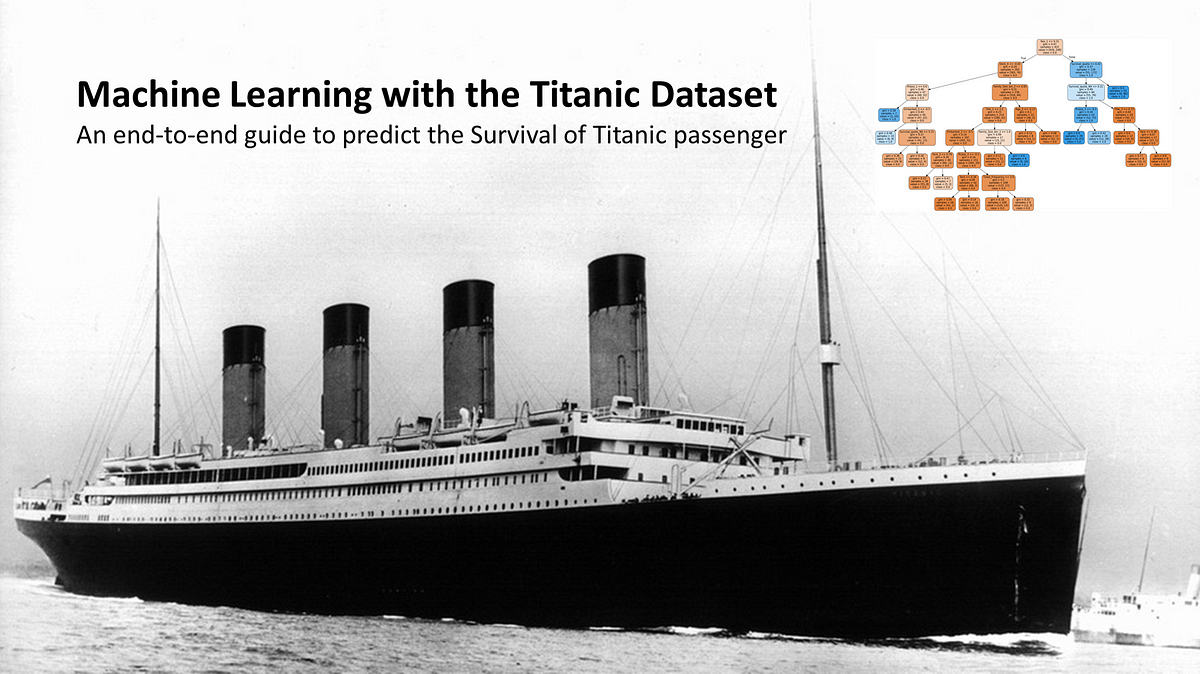

Makine öğrenmesi dünyasının meşhur problemi (bir proje) olan Titanic data seti ile tanışmaya hoş geldiniz arkadaşlar. Bu projemiz bir Kaggle Projesi olup sıklıkla kullanılan bir gerçek dünya data setidir. Data seti ile ilgili açıklamaya alttaki linkten ulaşabilirsiniz.

https://www.kaggle.com/c/titanic/overview

Bu problemde amacımız https://www.kaggle.com/c/titanic/overview linkindeki görevi yerine getirmek.

**Önemli Not:** Kaggle yarışmalarında bazen data,
* train data
* test data
olarak ayrı verilir.

Buradaki test data bizim model oluştururken kullanacağımız test data değildir.

Bu test data Kaggle'in yarışma sonuçları test etmek için kullandığı datadır.

Dolayısı ile bu test data içinde target variable yani gerçek label değeri (grand truth) bulunmaz.

Bu sebeple kendi model doğruluğumuzu ölçerken bu test datayı kullanamayacağınızdan mevcut train data ile train_test_split yaparak kendi test datanızı oluşturmayı unutmayın!

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

## Read Data

In [36]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Exploratory Data Analysis (EDA)

In [7]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

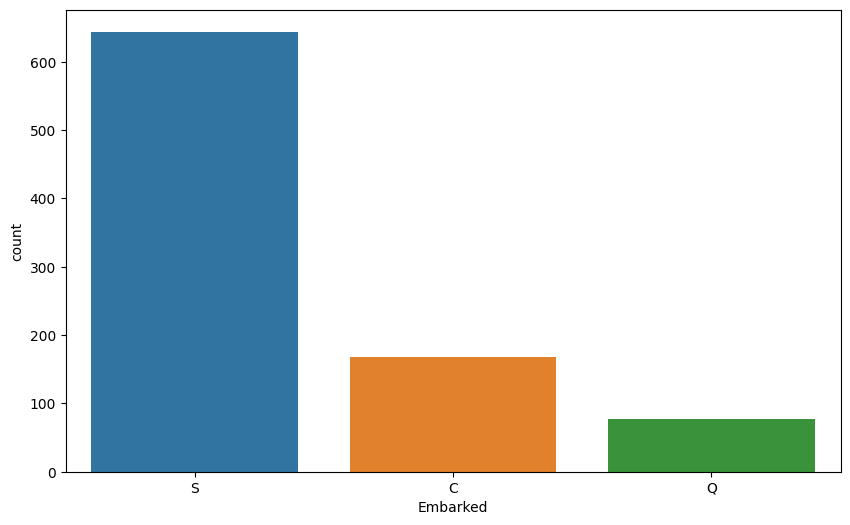

In [8]:
sns.countplot(df.Embarked);

In [9]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
df['Embarked'].fillna("S", inplace=True) # NaN values = S 

In [11]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

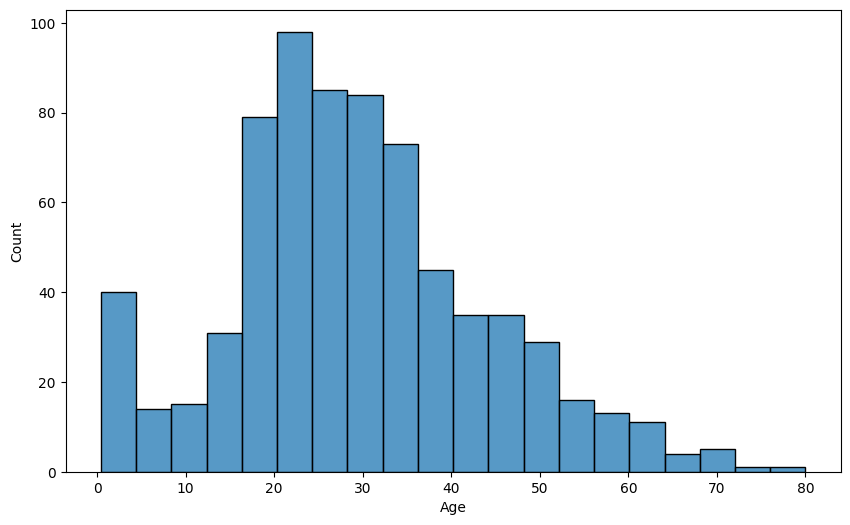

In [16]:
sns.histplot(df["Age"]);

In [17]:
df.Age.mean()

29.69911764705882

In [18]:
df.Age.median()

28.0

In [34]:
df['Age'].fillna(df.Age.median(), inplace=True)  # Nan Values = 30.0 as median of Age

In [26]:
df['Age'] = df['Age'].astype(int)

In [27]:
df.Age.unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

<AxesSubplot:xlabel='Age'>

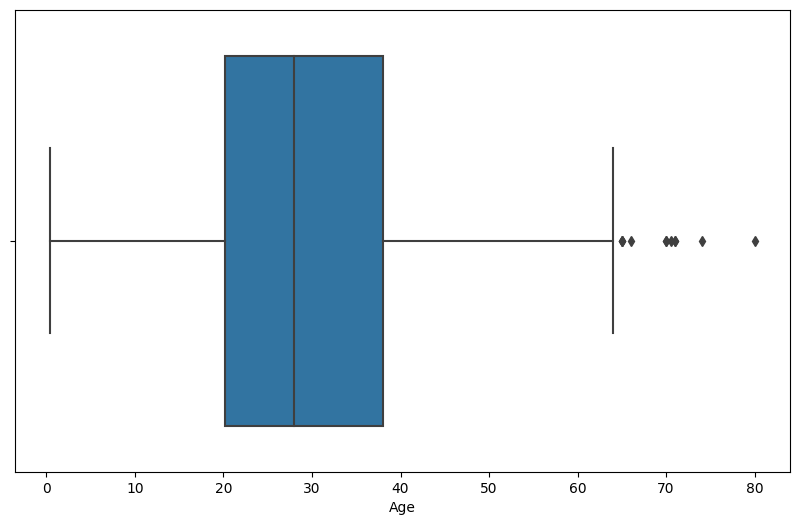

In [19]:
sns.boxplot(df["Age"])

<AxesSubplot:xlabel='Age'>

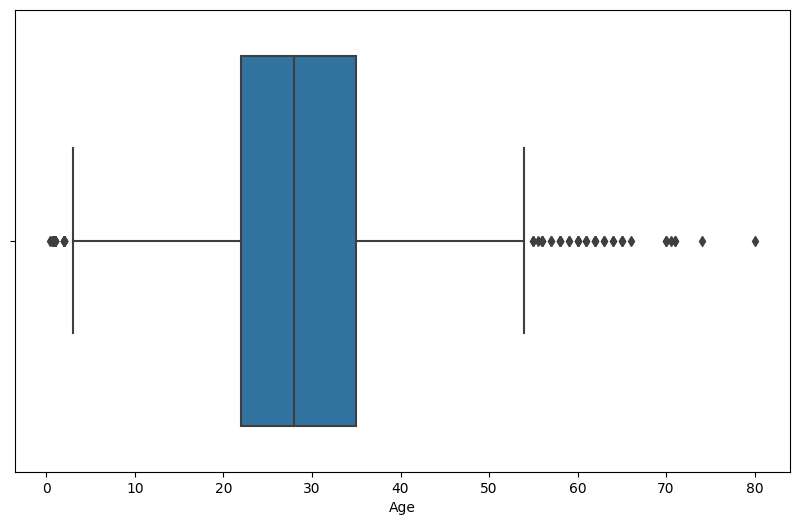

In [35]:
sns.boxplot(df["Age"]) # median

<AxesSubplot:xlabel='Age'>

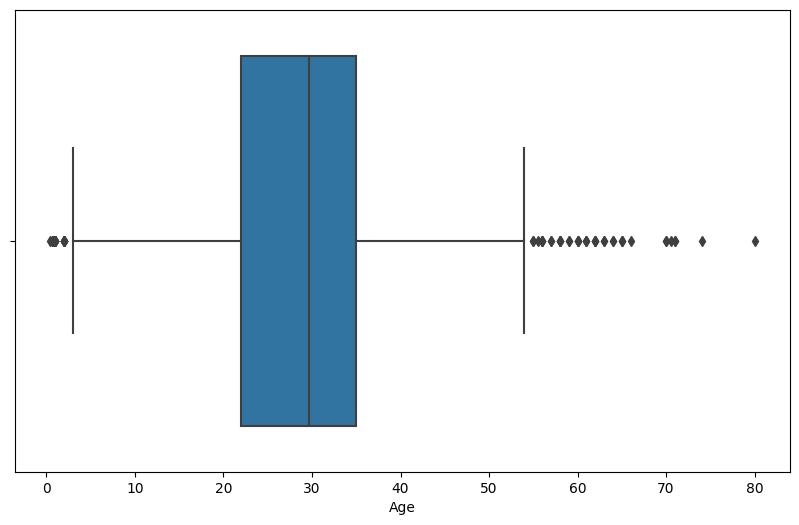

In [38]:
sns.boxplot(df["Age"]) #mean

In [37]:
df['Age'].fillna(df.Age.mean(), inplace=True)  # Nan Values = 30.0 as mean of Age

In [31]:
df['Age'] = df['Age'].astype(int)

In [16]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
df['Cabin'].fillna("unknown", inplace=True)  # Nan Values = unknown as mean of Age

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [19]:
df.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22,1,0,7.2500,unknown,S
1,1,1,female,38,1,0,71.2833,C85,C
2,1,3,female,26,0,0,7.9250,unknown,S
3,1,1,female,35,1,0,53.1000,C123,S
4,0,3,male,35,0,0,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,unknown,S
887,1,1,female,19,0,0,30.0000,B42,S
888,0,3,female,30,1,2,23.4500,unknown,S
889,1,1,male,26,0,0,30.0000,C148,C


In [20]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.070649,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.329822,0.083081,0.018443,-0.549500
Age,-0.070649,-0.329822,1.000000,-0.232201,-0.180581,0.090782
SibSp,-0.035322,0.083081,-0.232201,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.180581,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.090782,0.159651,0.216225,1.000000


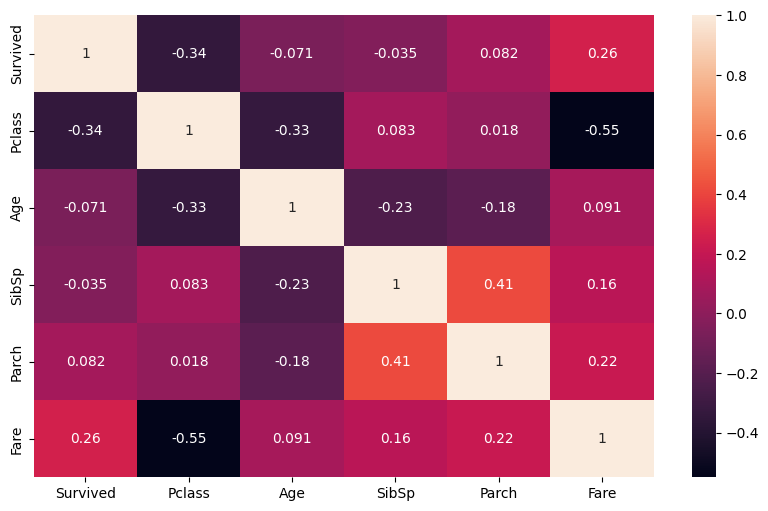

In [21]:
sns.heatmap(df.corr(), annot=True);

<Figure size 1200x600 with 0 Axes>

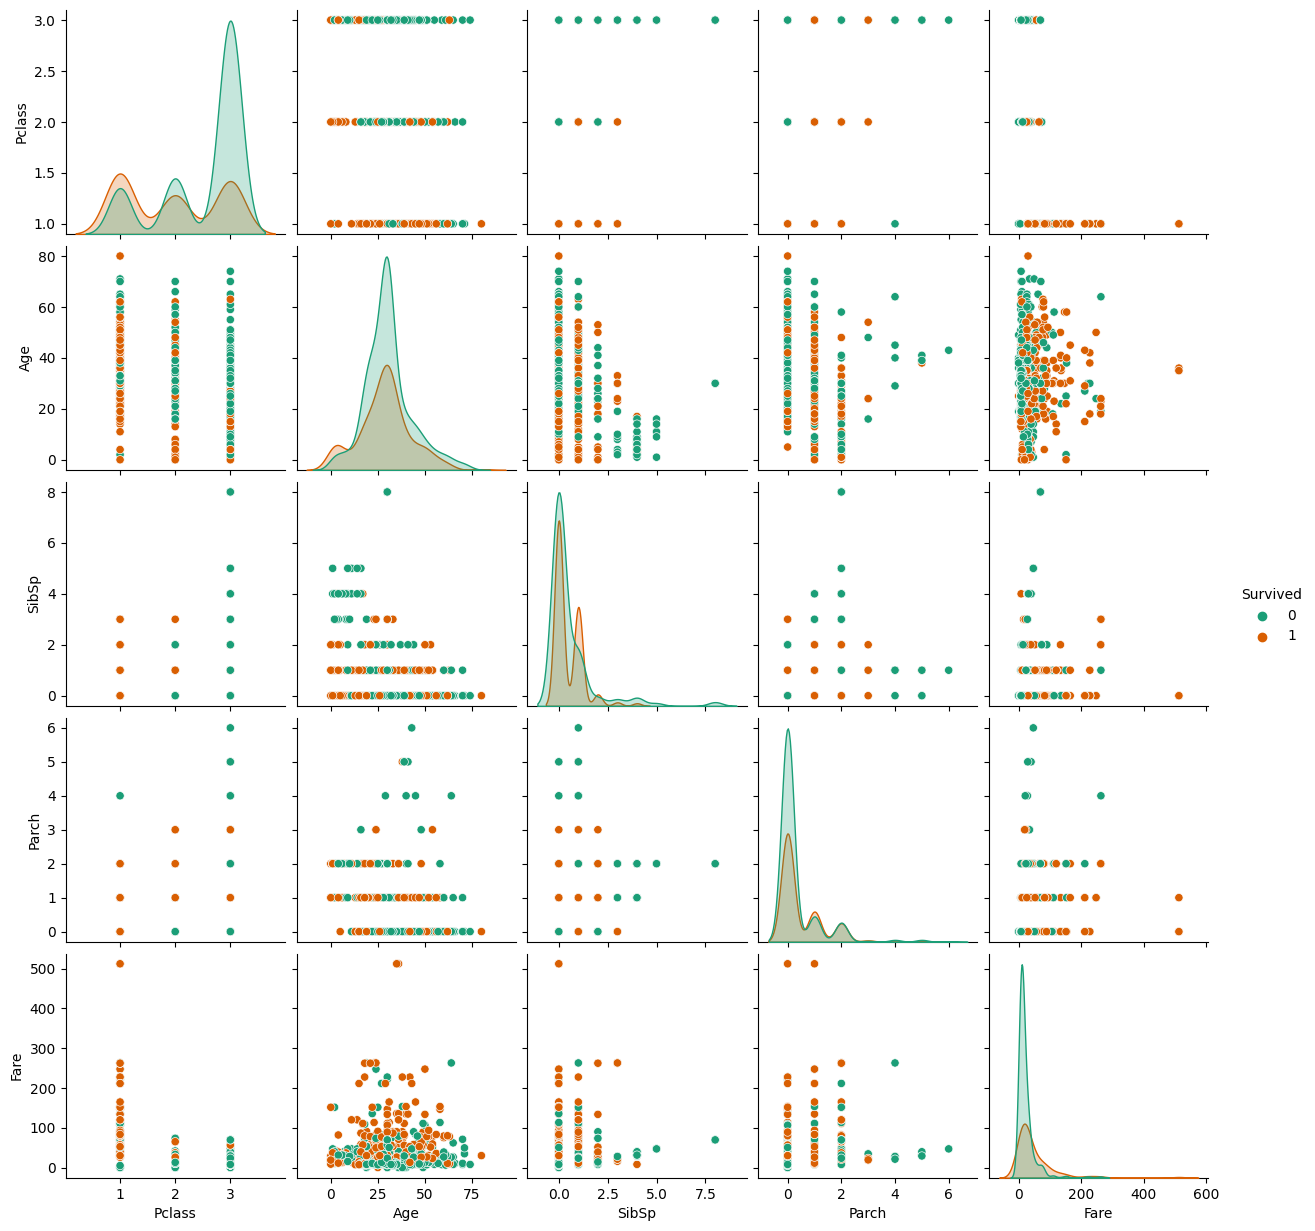

In [22]:
plt.figure(figsize=(12,6))
sns.pairplot(df, hue="Survived", palette="Dark2");

In [23]:
df.to_csv("titanic_train_eda.csv", index = False)

#PassengerId, Name and Ticket deleted, nan values filled

## Train | Test Split

In [24]:
df = pd.read_csv("titanic_train_eda.csv")

In [25]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
449,1,1,male,52,0,0,30.5000,C104,S
761,0,3,male,41,0,0,7.1250,unknown,S
96,0,1,male,71,0,0,34.6542,A5,C
547,1,2,male,30,0,0,13.8625,unknown,C
369,1,1,female,24,0,0,69.3000,B35,C


In [26]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Train | Test Split and Encoding

In [27]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
category = X.select_dtypes("object").columns
category

Index(['Sex', 'Cabin', 'Embarked'], dtype='object')

In [30]:
X[category]

,Sex,Cabin,Embarked
0,male,unknown,S
1,female,C85,C
2,female,unknown,S
3,female,C123,S
4,male,unknown,S
...,...,...,...
886,male,unknown,S
887,female,B42,S
888,female,unknown,S
889,male,C148,C


In [31]:
enc = OrdinalEncoder()
X[category] = enc.fit_transform(X[category])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1.0,22,1,0,7.2500,147.0,2.0
1,1,0.0,38,1,0,71.2833,81.0,0.0
2,3,0.0,26,0,0,7.9250,147.0,2.0
3,1,0.0,35,1,0,53.1000,55.0,2.0
4,3,1.0,35,0,0,8.0500,147.0,2.0


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=101)

## Modelling | Model Performance

In [33]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [34]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=101)

In [35]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[152  20]
 [ 27  69]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       172
           1       0.78      0.72      0.75        96

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268


Train_Set
[[376   1]
 [  9 237]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       1.00      0.96      0.98       246

    accuracy                           0.98       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



In [41]:
from sklearn.model_selection import cross_val_score, cross_validate

scores = cross_validate(rf_model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.804352
test_precision_micro    0.804352
test_recall_micro       0.804352
test_f1_micro           0.804352
dtype: float64

In [39]:
from sklearn.tree import plot_tree
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test, model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model.estimators_[19], feature_names=X.columns,
          filled = True,
          fontsize = 8);



Test Set
[[152  20]
 [ 27  69]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       172
           1       0.78      0.72      0.75        96

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



Train Set
[[376   1]
 [  9 237]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       377
           1       1.00      0.96      0.98       246

    accuracy                           0.98       623
   macro avg       0.99      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623



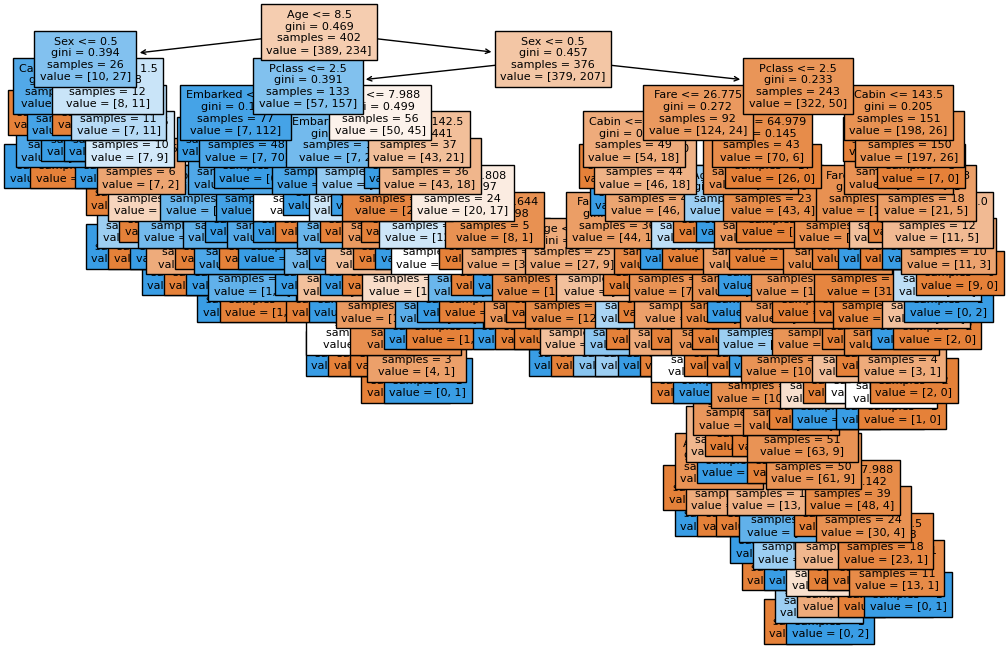

In [43]:
report_model(rf_model)

In [37]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
Sex,0.261121
Fare,0.245304
Age,0.228157
Cabin,0.080777
Pclass,0.064962
SibSp,0.049162
Embarked,0.036180
Parch,0.034338


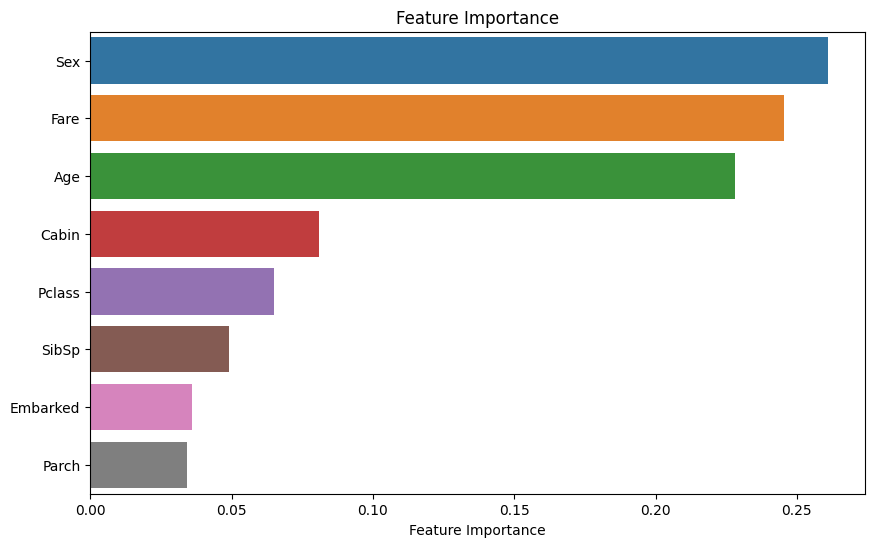

In [38]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

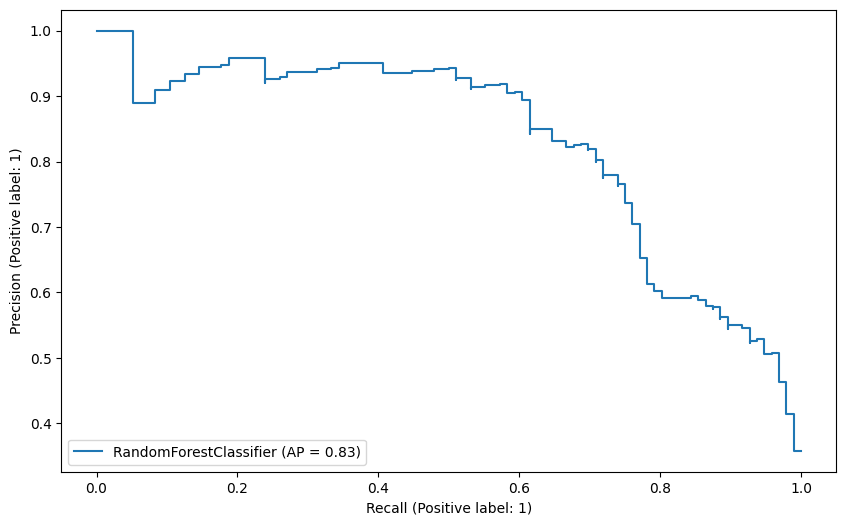

In [46]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

plot_precision_recall_curve(rf_model, X_test, y_test);

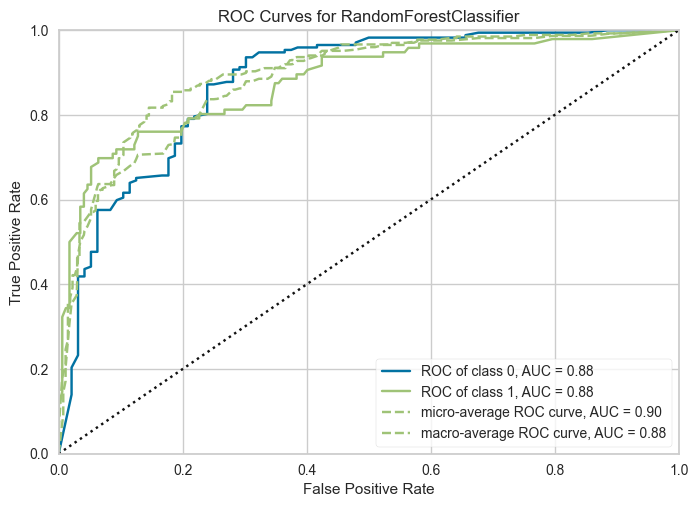

In [47]:
from yellowbrick.classifier import ROCAUC
rf_model = RandomForestClassifier()
visualizer = ROCAUC(rf_model)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();                       

# GridSearch 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {'n_estimators':[64, 128, 200, 300],   
             'max_features':[1, 2, 3, "auto"],
             'max_depth':[1, 2, 3, 5],
             'min_samples_split':[1, 2, 3, 4, 5]}

In [50]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             scoring = "recall",
                             n_jobs = -1,
                             verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [51]:
rf_grid_model.best_params_

{'max_depth': 1,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [52]:
rf_grid_model.best_score_    # recall

0.7923265306122449

In [53]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[137  35]
 [ 19  77]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       172
           1       0.69      0.80      0.74        96

    accuracy                           0.80       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.81      0.80      0.80       268


Train_Set
[[278  99]
 [ 47 199]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       377
           1       0.67      0.81      0.73       246

    accuracy                           0.77       623
   macro avg       0.76      0.77      0.76       623
weighted avg       0.78      0.77      0.77       623



In [60]:
modelf = model = RandomForestClassifier(class_weight = "balanced", max_depth=1, max_features=2,
                                        min_samples_split=2, n_estimators=200, random_state=101)
modelf.fit(X_train, y_train) #balanced_subsample

RandomForestClassifier(class_weight='balanced', max_depth=1, max_features=2,
                       n_estimators=200, random_state=101)

In [61]:
scores = cross_validate(modelf, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy           0.764081
test_precision_micro    0.764081
test_recall_micro       0.764081
test_f1_micro           0.764081
dtype: float64

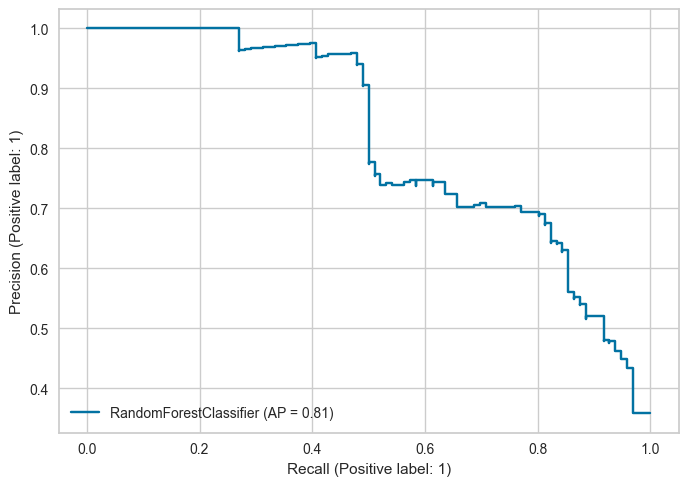

In [63]:
plot_precision_recall_curve(modelf, X_test, y_test);

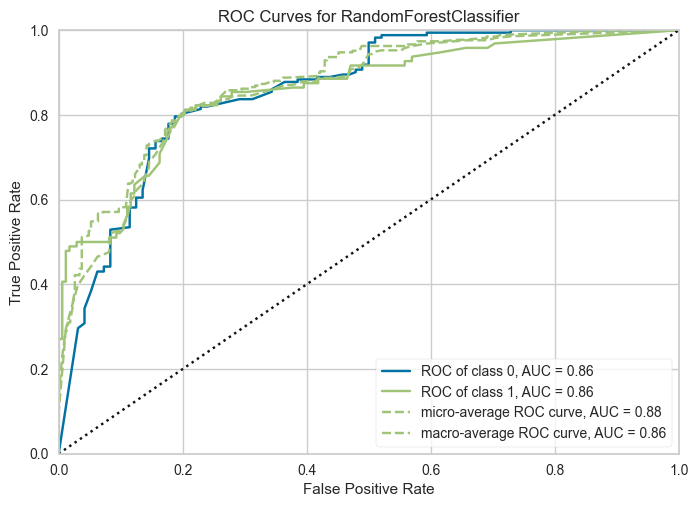

In [64]:
visualizer = ROCAUC(modelf)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();     

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THE END</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |